## Шаг 3: Предварительныя обработка

Проанализируйте столбцы. Что в них содержится? Опишите переменные. Есть ли в данных пропуски? Обработайте пропуски. Если в какой-то колонке пропусков большинство, то ее можно удалить. Если их не очень много, можно заполнить их медианой/средним или чем-нибудь еще, напишите почему вы выбрали тот или иной вариант.

1) Подключение библиотек

In [1]:
import numpy as np
import pandas as pd

2) Вывод неотредактированных данных

In [2]:
df = pd.read_excel('Cian.xlsx')

display(df.head())

,web-scraper-order,web-scraper-start-url,Name,Date,Price,Metro,Metro_Time
0,1712919208-1,https://www.cian.ru/cat.php?deal_type=sale&eng...,"2-комн. квартира, 88,5 м², 2/5 этаж","сегодня, 04:48",198 460 000 ₽,Площадь Революции,3 минуты пешком
1,1712919208-2,https://www.cian.ru/cat.php?deal_type=sale&eng...,Светлая квартира в особняке !,"вчера, 15:16",75 000 000 ₽,Трубная,4 минуты пешком
2,1712919208-3,https://www.cian.ru/cat.php?deal_type=sale&eng...,"2-комн. квартира, 64,07 м², 21/75 этаж","сегодня, 13:10",30 790 760 ₽,Площадь Гагарина,9 минут пешком
3,1712919208-4,https://www.cian.ru/cat.php?deal_type=sale&eng...,NaN,NaN,NaN,NaN,NaN
4,1712919208-5,https://www.cian.ru/cat.php?deal_type=sale&eng...,"2-комн. апартаменты, 82,4 м², 5/8 этаж","сегодня, 12:40",83 800 800 ₽,Китай-город,2 минуты пешком


### Описание столбцов:

1. web-scraper-order: ID каждой записи, было принято решение удалить повторяющуюся часть номера, находящуюся до тире, а также переименовать столбец.Числовой формат ячейки.
2. web-scraper-start-url: повторяющееся значение, столбец не несёт никакой смысловой информации, полезной для анализа, удаляем весь столбец.Текстовый формат ячейки.
3. Name: название объявления, часто указывается площадь, количество комнат, этаж. Принято решение разделить на 3 стобца - Площадь, Кол-во комнат, Этаж. Текстовый формат ячейки.
4. Date: дата публикации объявления, так как парсинг данных проводился 12 апреля, заменим "сегодня" и "вчера" на 12.04 и 11.04 соответственно, также удаляем время публикации. Текстовый формат ячейки.
5. Price: стоимость месячной аренды данного помещения, при парсинге слетела запятая и цены увеличились в 3 раза. Помимо удаления 3х нулей в кажой из записей, все цены указаны в рублях, так что переводить в рубли из других валют не потребовалось, а также удалён знак рубля. Текстовый формат ячейки.
6. Metro: ближайшая станция метро, значения столбца не будем изменять. Текстовый формат ячейки.
7. Metro_Time: указание времени, необходимого для того, чтобы добраться до ближайшей станции метро. Однако каждый создатель объявления указывает время в разном формате: пешком или используя транспорт. Переведём время для того, чтобы добраться до метро с помощью транспорта в время, затраченного на пешую прогулку в номальном темпе, умножив время транспорта в 10 раз. Текстовый формат ячейки.

3) Удаление строк, в которых пустых ячеек больше половины. Было принято решение удалить эти строки, так как встретилось достаточно большое количество пустых строк, где есть данные только 1 и 2 столбца, которые не несут определённой пользы для анализа этих данных.

Мы запускали этот код на Visual Studio Code IDE, так как долго не могли справиться с удалением строк через Google colab и Jupiter notebook.


In [3]:
missing_values = df.isna().sum()

majority_gaps_columns = missing_values[missing_values > len(df) * 0.5].index
cleaned_data = df.dropna()

cleaned_data.to_excel("cleaned_data.xlsx", index=False)

In [4]:
df = pd.read_excel('cleaned_data.xlsx')

display(df.head())

,web-scraper-order,web-scraper-start-url,Name,Date,Price,Metro,Metro_Time
0,1712919208-1,https://www.cian.ru/cat.php?deal_type=sale&eng...,"2-комн. квартира, 88,5 м², 2/5 этаж","сегодня, 04:48",198 460 000 ₽,Площадь Революции,3 минуты пешком
1,1712919208-2,https://www.cian.ru/cat.php?deal_type=sale&eng...,Светлая квартира в особняке !,"вчера, 15:16",75 000 000 ₽,Трубная,4 минуты пешком
2,1712919208-3,https://www.cian.ru/cat.php?deal_type=sale&eng...,"2-комн. квартира, 64,07 м², 21/75 этаж","сегодня, 13:10",30 790 760 ₽,Площадь Гагарина,9 минут пешком
3,1712919208-5,https://www.cian.ru/cat.php?deal_type=sale&eng...,"2-комн. апартаменты, 82,4 м², 5/8 этаж","сегодня, 12:40",83 800 800 ₽,Китай-город,2 минуты пешком
4,1712919208-6,https://www.cian.ru/cat.php?deal_type=sale&eng...,"2-комн. апартаменты, 62,3 м², 8/9 этаж","сегодня, 04:30",85 974 000 ₽,Маяковская,1 минута пешком


Хорошо видно, что 3 строка была пустая, и код удалил её.

4) Удаление второго столбца web-scraper-start-url.

In [5]:
df.drop(df.columns[1], axis=1, inplace=True)

display(df.head())

,web-scraper-order,Name,Date,Price,Metro,Metro_Time
0,1712919208-1,"2-комн. квартира, 88,5 м², 2/5 этаж","сегодня, 04:48",198 460 000 ₽,Площадь Революции,3 минуты пешком
1,1712919208-2,Светлая квартира в особняке !,"вчера, 15:16",75 000 000 ₽,Трубная,4 минуты пешком
2,1712919208-3,"2-комн. квартира, 64,07 м², 21/75 этаж","сегодня, 13:10",30 790 760 ₽,Площадь Гагарина,9 минут пешком
3,1712919208-5,"2-комн. апартаменты, 82,4 м², 5/8 этаж","сегодня, 12:40",83 800 800 ₽,Китай-город,2 минуты пешком
4,1712919208-6,"2-комн. апартаменты, 62,3 м², 8/9 этаж","сегодня, 04:30",85 974 000 ₽,Маяковская,1 минута пешком


5) Изменение номера ID, так как подстрока '1712919208-' была во всех строках наших данных.

In [6]:
#df['web-scraper-order'] = df['web-scraper-order'].str.replace('1712919208-', '')
df['web-scraper-order'] = df['web-scraper-order'].str.split('-', n=1).str.get(1)
display(df.head())

,web-scraper-order,Name,Date,Price,Metro,Metro_Time
0,1,"2-комн. квартира, 88,5 м², 2/5 этаж","сегодня, 04:48",198 460 000 ₽,Площадь Революции,3 минуты пешком
1,2,Светлая квартира в особняке !,"вчера, 15:16",75 000 000 ₽,Трубная,4 минуты пешком
2,3,"2-комн. квартира, 64,07 м², 21/75 этаж","сегодня, 13:10",30 790 760 ₽,Площадь Гагарина,9 минут пешком
3,5,"2-комн. апартаменты, 82,4 м², 5/8 этаж","сегодня, 12:40",83 800 800 ₽,Китай-город,2 минуты пешком
4,6,"2-комн. апартаменты, 62,3 м², 8/9 этаж","сегодня, 04:30",85 974 000 ₽,Маяковская,1 минута пешком


6) Переименование первого столбца.

In [7]:
df.rename(columns={'web-scraper-order': 'ID'}, inplace=True)
display(df.head())

,ID,Name,Date,Price,Metro,Metro_Time
0,1,"2-комн. квартира, 88,5 м², 2/5 этаж","сегодня, 04:48",198 460 000 ₽,Площадь Революции,3 минуты пешком
1,2,Светлая квартира в особняке !,"вчера, 15:16",75 000 000 ₽,Трубная,4 минуты пешком
2,3,"2-комн. квартира, 64,07 м², 21/75 этаж","сегодня, 13:10",30 790 760 ₽,Площадь Гагарина,9 минут пешком
3,5,"2-комн. апартаменты, 82,4 м², 5/8 этаж","сегодня, 12:40",83 800 800 ₽,Китай-город,2 минуты пешком
4,6,"2-комн. апартаменты, 62,3 м², 8/9 этаж","сегодня, 04:30",85 974 000 ₽,Маяковская,1 минута пешком


7) Разбиение столбца Name на 3 новых столбца: Rooms, Area, Floor, которые указывают на количество комнат, площадь и этаж квартиры. А также удаление строк столбца Name, которые не несут никакого смысла, например, 'Светлая квартира в особняке !' и по итогу удаление столбца Name.

In [8]:
import re

def extract_info(row):
    match = re.search(r'(\d+)-комн\. (квартира|апартаменты), ([\d,\.]+) м², (.+)', row)
    if match:
        return match.group(1), match.group(3), match.group(4)
    else:
        return None, None, None

df['Rooms'], df['Area'], df['Floor'] = zip(*df['Name'].apply(extract_info))
df.dropna(subset=['Rooms', 'Area', 'Floor'], inplace=True)
df.drop(columns=['Name'], inplace=True)

display(df.head())

,ID,Date,Price,Metro,Metro_Time,Rooms,Area,Floor
0,1,"сегодня, 04:48",198 460 000 ₽,Площадь Революции,3 минуты пешком,2,"88,5",2/5 этаж
2,3,"сегодня, 13:10",30 790 760 ₽,Площадь Гагарина,9 минут пешком,2,"64,07",21/75 этаж
3,5,"сегодня, 12:40",83 800 800 ₽,Китай-город,2 минуты пешком,2,"82,4",5/8 этаж
4,6,"сегодня, 04:30",85 974 000 ₽,Маяковская,1 минута пешком,2,"62,3",8/9 этаж
5,8,"8 апр, 15:43",135 540 000 ₽,Парк Культуры,10 минут пешком,2,"75,3",4/9 этаж


8) Удаление пробелов и слова этаж из столбца Floor.

In [9]:
df['Floor'] = df['Floor'].str.replace('этаж', '').str.replace(' ', '')

display(df.head())

,ID,Date,Price,Metro,Metro_Time,Rooms,Area,Floor
0,1,"сегодня, 04:48",198 460 000 ₽,Площадь Революции,3 минуты пешком,2,"88,5",2/5
2,3,"сегодня, 13:10",30 790 760 ₽,Площадь Гагарина,9 минут пешком,2,"64,07",21/75
3,5,"сегодня, 12:40",83 800 800 ₽,Китай-город,2 минуты пешком,2,"82,4",5/8
4,6,"сегодня, 04:30",85 974 000 ₽,Маяковская,1 минута пешком,2,"62,3",8/9
5,8,"8 апр, 15:43",135 540 000 ₽,Парк Культуры,10 минут пешком,2,"75,3",4/9


9) Редактирование данных столбца Date: удаление времени, и изменение слов 'сегодня' и 'вчера' на '12 апр' и '11 апр' соответственно.

In [10]:
df['Date'] = df['Date'].apply(lambda x: x.split(',')[0])
df['Date'] = df['Date'].str.replace('сегодня', '12 апр').str.replace('вчера', '11 апр')

display(df.head())

,ID,Date,Price,Metro,Metro_Time,Rooms,Area,Floor
0,1,12 апр,198 460 000 ₽,Площадь Революции,3 минуты пешком,2,"88,5",2/5
2,3,12 апр,30 790 760 ₽,Площадь Гагарина,9 минут пешком,2,"64,07",21/75
3,5,12 апр,83 800 800 ₽,Китай-город,2 минуты пешком,2,"82,4",5/8
4,6,12 апр,85 974 000 ₽,Маяковская,1 минута пешком,2,"62,3",8/9
5,8,8 апр,135 540 000 ₽,Парк Культуры,10 минут пешком,2,"75,3",4/9


10) Редактирование столбца Price, так как при парсинге данных слетела запятая, и сумма аренды увеличилась в 3 раза, а также удаление знака рубля и пробелов.

In [11]:
df['Price'] = df['Price'].str.replace('₽', '').str.replace(' ', '')
df['Price'] = df['Price'].apply(lambda x: int(str(x)[:-4]) if not pd.isnull(x) else x)

display(df.head())

,ID,Date,Price,Metro,Metro_Time,Rooms,Area,Floor
0,1,12 апр,198460,Площадь Революции,3 минуты пешком,2,"88,5",2/5
2,3,12 апр,30790,Площадь Гагарина,9 минут пешком,2,"64,07",21/75
3,5,12 апр,83800,Китай-город,2 минуты пешком,2,"82,4",5/8
4,6,12 апр,85974,Маяковская,1 минута пешком,2,"62,3",8/9
5,8,8 апр,135540,Парк Культуры,10 минут пешком,2,"75,3",4/9


11) Удаление подстрок 'минут пешком', 'минуты пешком', 'минута пешком' из столбца Metro_Time.

In [12]:
df['Metro_Time'] = df['Metro_Time'].str.replace('минуты пешком', '').str.replace('минут пешком', '').str.replace('минута пешком', '')

display(df.head())

,ID,Date,Price,Metro,Metro_Time,Rooms,Area,Floor
0,1,12 апр,198460,Площадь Революции,3,2,"88,5",2/5
2,3,12 апр,30790,Площадь Гагарина,9,2,"64,07",21/75
3,5,12 апр,83800,Китай-город,2,2,"82,4",5/8
4,6,12 апр,85974,Маяковская,1,2,"62,3",8/9
5,8,8 апр,135540,Парк Культуры,10,2,"75,3",4/9


12) Удаление подстрок 'минут на транспорте', 'минуты на транспорте', 'минута на транспорте' из столбца Metro_Time, а также домнажение именно этих значений на 10 (это обасновано тем, что средняя скорость пешехода 5 км/ч, а средняя скорость транспортного средства в городе 50 км/ч).

In [13]:
mask = df['Metro_Time'].str.contains('минут на транспорте|минута на транспорте|минуты на транспорте', regex=True)
df.loc[mask, 'Metro_Time'] = pd.to_numeric(df.loc[mask, 'Metro_Time']
                                            .str.replace('минут на транспорте', '')
                                            .str.replace('минута на транспорте', '')
                                            .str.replace('минуты на транспорте', '')
                                            .str.strip(), errors='coerce') * 10

display(df.head())

,ID,Date,Price,Metro,Metro_Time,Rooms,Area,Floor
0,1,12 апр,198460,Площадь Революции,3,2,"88,5",2/5
2,3,12 апр,30790,Площадь Гагарина,9,2,"64,07",21/75
3,5,12 апр,83800,Китай-город,2,2,"82,4",5/8
4,6,12 апр,85974,Маяковская,1,2,"62,3",8/9
5,8,8 апр,135540,Парк Культуры,10,2,"75,3",4/9


# Шаг 4: Визуализация


Сделайте для своих данных разведочный анализ данных, Exploratory Data Analysis (EDA). Выясните, какие в данных есть особенности, визуализируйте их. Ваша задача — откопать в данных интересные закономерности и построить для них красивые, понятные визуализации, на основе которых можно выдвинуть гипотезы и создать для датасета новые переменные.

###Exploratory Data Analysis (EDA).

1) Вывод исходной таблицы.

In [14]:
display(df.head())

,ID,Date,Price,Metro,Metro_Time,Rooms,Area,Floor
0,1,12 апр,198460,Площадь Революции,3,2,"88,5",2/5
2,3,12 апр,30790,Площадь Гагарина,9,2,"64,07",21/75
3,5,12 апр,83800,Китай-город,2,2,"82,4",5/8
4,6,12 апр,85974,Маяковская,1,2,"62,3",8/9
5,8,8 апр,135540,Парк Культуры,10,2,"75,3",4/9


2) Для удобства переведём столбцы Metro_Time, Rooms, Area в числовой формат. А столбец Floor разделим на Floor и Total_Floor, где данные тоже будут в числовом формате.

In [15]:
df['Metro_Time'] = pd.to_numeric(df['Metro_Time'], errors='coerce')
df['Rooms'] = pd.to_numeric(df['Rooms'], errors='coerce')
df['Area'] = df['Area'].str.replace(',', '.').astype(float)

df[['Floor', 'Total_Floor']] = df['Floor'].str.split('/', expand=True)
df['Floor'] = pd.to_numeric(df['Floor'], errors='coerce')
df['Total_Floor'] = pd.to_numeric(df['Total_Floor'], errors='coerce')

display(df.head())

,ID,Date,Price,Metro,Metro_Time,Rooms,Area,Floor,Total_Floor
0,1,12 апр,198460,Площадь Революции,3,2,88.50,2,5
2,3,12 апр,30790,Площадь Гагарина,9,2,64.07,21,75
3,5,12 апр,83800,Китай-город,2,2,82.40,5,8
4,6,12 апр,85974,Маяковская,1,2,62.30,8,9
5,8,8 апр,135540,Парк Культуры,10,2,75.30,4,9


3) Начало работы со статистикой, а именно вычисление: количества значений, среднего значения, стандартного отклонения, минимального и максимального значения, медианы.

In [16]:
selected_columns = ['Metro_Time', 'Rooms', 'Area', 'Floor', 'Total_Floor', 'Price']
summary_stats_selected = df[selected_columns].describe()

median_selected = df[selected_columns].median().to_frame().transpose()
median_selected.index = ['median']
summary_stats_selected = pd.concat([summary_stats_selected, median_selected])
summary_stats_selected.drop(['25%', '50%', '75%'], inplace=True)

display(summary_stats_selected)

,Metro_Time,Rooms,Area,Floor,Total_Floor,Price
count,5390.000000,5390.000000,5390.000000,5390.000000,5390.000000,5390.000000
mean,11.199629,1.892208,68.077351,7.076067,20.190167,81238.097588
std,19.388093,0.310147,22.315906,6.726461,15.910576,65403.255368
min,1.000000,1.000000,19.000000,1.000000,1.000000,5500.000000
max,300.000000,2.000000,178.600000,59.000000,85.000000,223727.000000
median,8.000000,2.000000,64.070000,4.000000,14.000000,53851.000000


4) Построение гистограмм для столбцов 'Metro_Time', 'Rooms', 'Area', 'Floor', 'Total_Floor' и 'Price', чтобы увидеть их распределение. Благодаря чему мы определим наиболее распространеные значения данных.

<ipython-input-17-25227c1a4dad>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


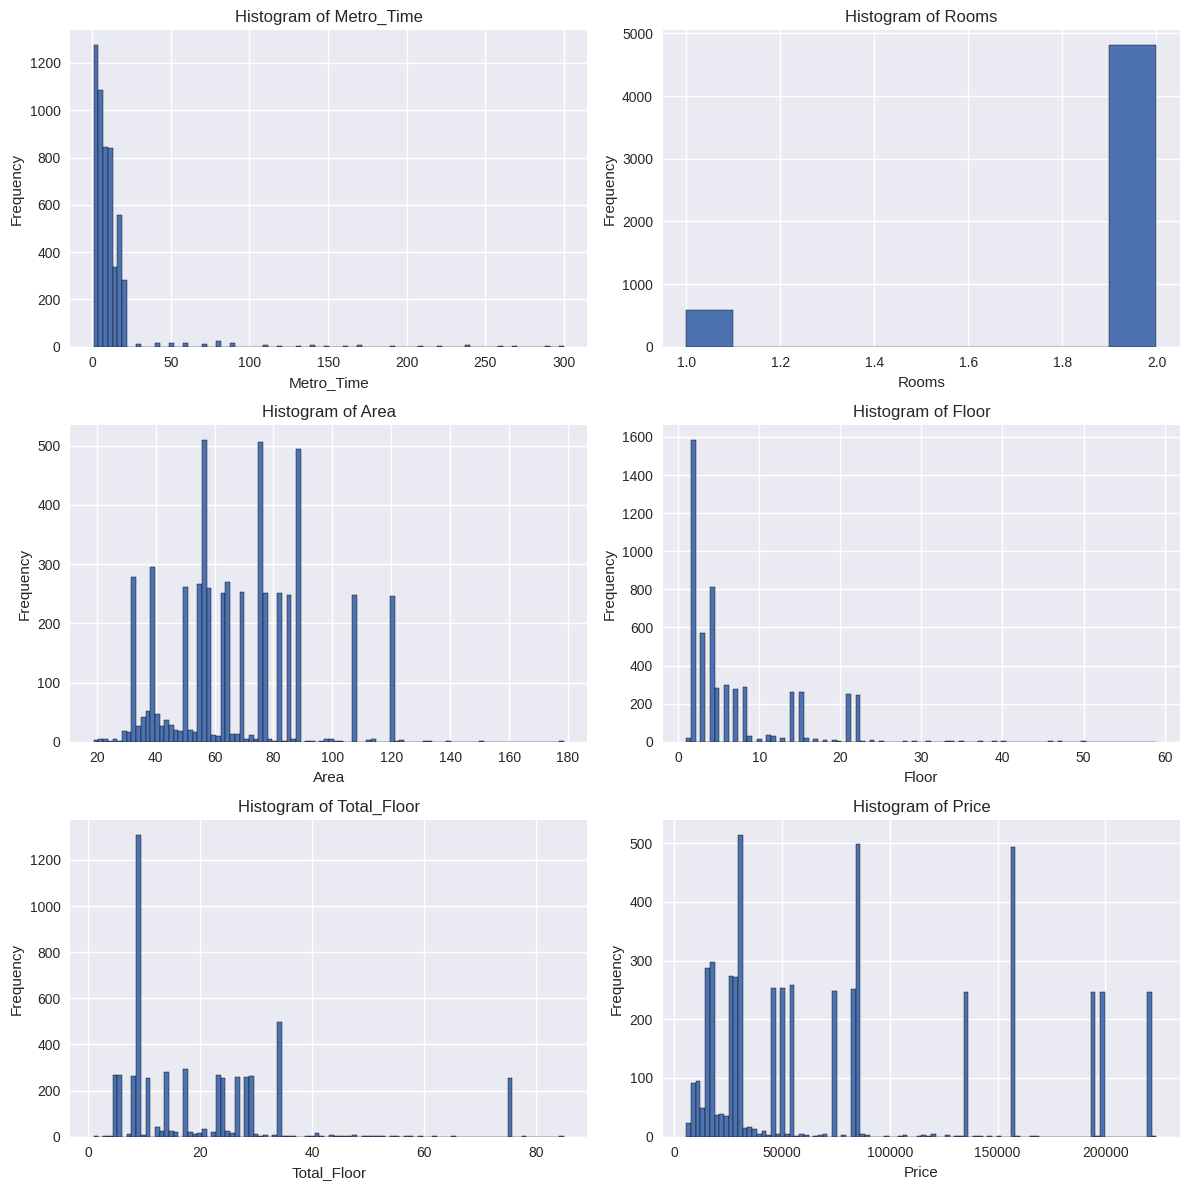

In [17]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

df['Metro_Time'].hist(ax=axes[0, 0], bins=100, edgecolor='black')
axes[0, 0].set_title('Histogram of Metro_Time')
axes[0, 0].set_xlabel('Metro_Time')
axes[0, 0].set_ylabel('Frequency')

df['Rooms'].hist(ax=axes[0, 1], bins=10, edgecolor='black')
axes[0, 1].set_title('Histogram of Rooms')
axes[0, 1].set_xlabel('Rooms')
axes[0, 1].set_ylabel('Frequency')

df['Area'].hist(ax=axes[1, 0], bins=100, edgecolor='black')
axes[1, 0].set_title('Histogram of Area')
axes[1, 0].set_xlabel('Area')
axes[1, 0].set_ylabel('Frequency')

df['Floor'].hist(ax=axes[1, 1], bins=100, edgecolor='black')
axes[1, 1].set_title('Histogram of Floor')
axes[1, 1].set_xlabel('Floor')
axes[1, 1].set_ylabel('Frequency')

df['Total_Floor'].hist(ax=axes[2, 0], bins=100, edgecolor='black')
axes[2, 0].set_title('Histogram of Total_Floor')
axes[2, 0].set_xlabel('Total_Floor')
axes[2, 0].set_ylabel('Frequency')

df['Price'].hist(ax=axes[2, 1], bins=100, edgecolor='black')
axes[2, 1].set_title('Histogram of Price')
axes[2, 1].set_xlabel('Price')
axes[2, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

5) Построение диаграмм рассеяния, чтобы выявить взаимосвязи между переменными. Первая диаграмма - связь между Стоимостью и площадью, вторая диаграмма - связь меджу расстоянием до метро (лучше сказать временем, которое неободимо для преодоления растояния между квартирой и метро) и Стоимостью.



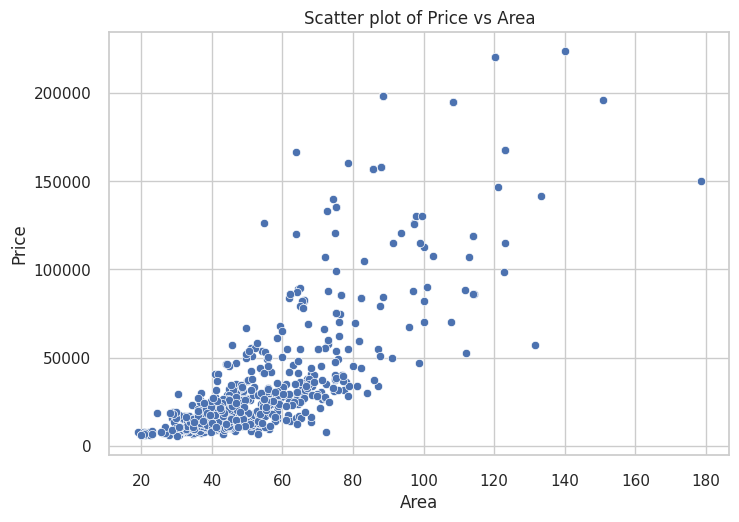

In [18]:
import seaborn as sns

sns.set(style="whitegrid")

sns.scatterplot(x='Area', y='Price', data=df)
plt.title('Scatter plot of Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

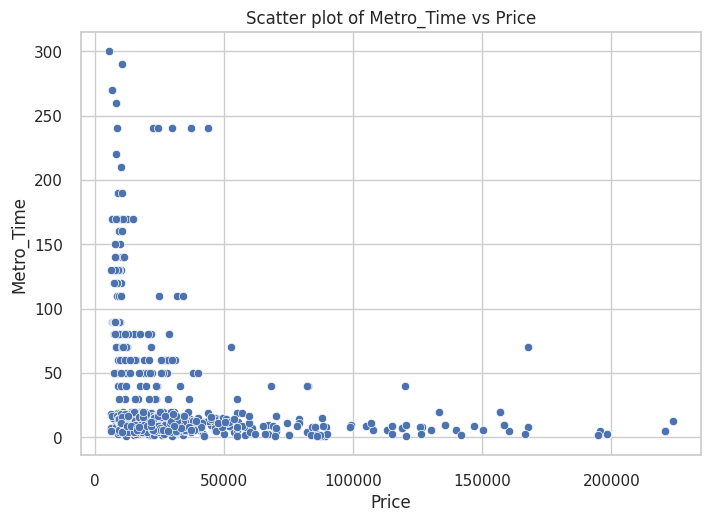

In [19]:
sns.scatterplot(x='Price', y='Metro_Time', data=df)
plt.title('Scatter plot of Metro_Time vs Price')
plt.xlabel('Price')
plt.ylabel('Metro_Time')
plt.show()

6) Построение тепловой карты корреляции между всеми числовыми столбцами, чтобы увидеть, какие переменные коррелируют друг с другом. Это поможет определить, какие переменные взаимосвязаны, и выделить ключевые факторы.

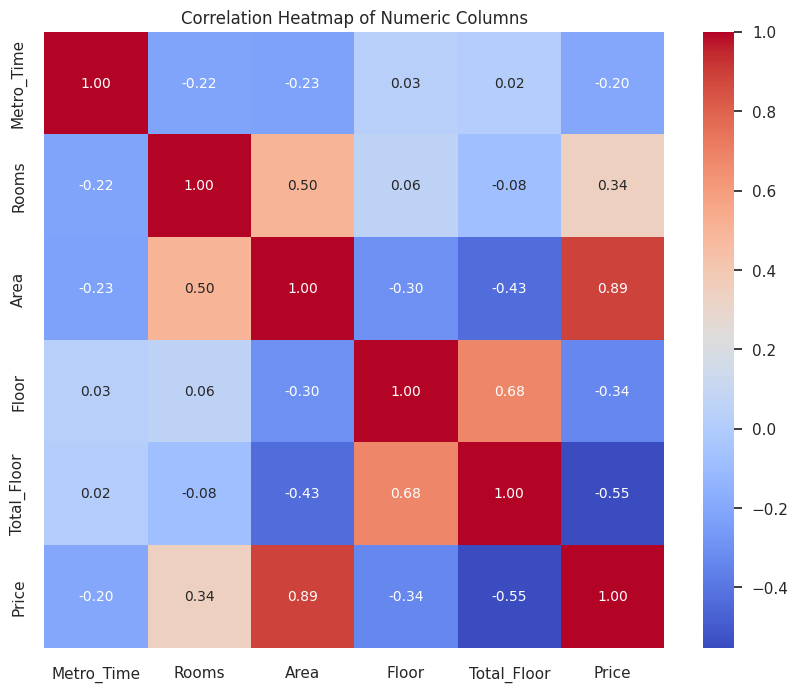

In [20]:
numeric_columns = ['Metro_Time', 'Rooms', 'Area', 'Floor', 'Total_Floor', 'Price']
numeric_df = df[numeric_columns]

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

# Шаг 6. Гипотезы

###Список гипотез, которые мы собираемся проверить:


1.   Влияет ли этаж, на котором расположена квартира, на ее цену? Правда ли, что квартиры на верхних этажах обычно стоят дороже из-за лучшего видового положения.
2.   Может ли общее количество этажей в доме влиять на цену квартиры? Например, квартиры в многоэтажных зданиях могут стоить дешевле из-за большей конкуренции.
3. Возможно ли выявить колебания в ценах на недвижимость, зависящие от дня недели? Например, цены на авиабилеты обычно среди недели дешевле чем в выходные, но есть ли какая-то корреляция между стоимостью жилья и днём недели, когда было опубликовано объявление.





1) Для того, чтобы доказать или опровергнуть первую гипотезу, будем строить диаграмму рассеяния, чтобы выявить взаимосвязи между переменными, а также высчитывать корелляцию между переменной (Этаж/Всего этажей) и Стоимостью аренды.

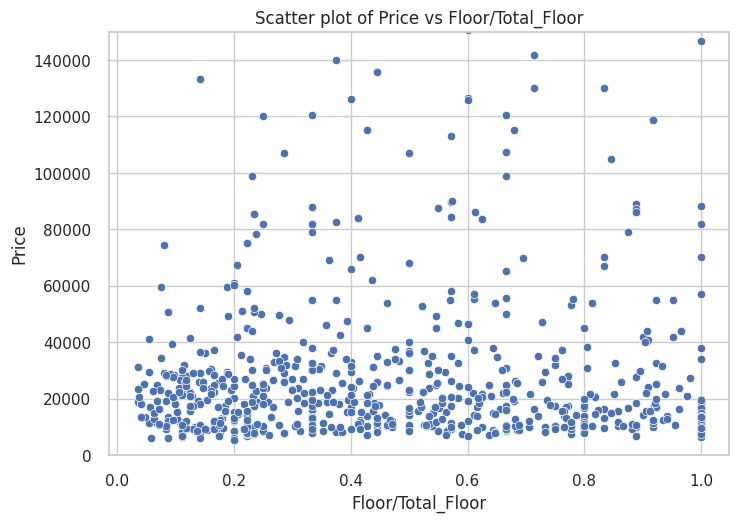

In [21]:
df['Floor_Ratio'] = df['Floor'] / df['Total_Floor']

sns.scatterplot(x='Floor_Ratio', y='Price', data=df)
plt.title('Scatter plot of Price vs Floor/Total_Floor')
plt.xlabel('Floor/Total_Floor')
plt.ylabel('Price')
plt.ylim(0, 150000)
plt.show()

In [22]:
correlation = df['Floor_Ratio'].corr(df['Price'])
print(f"Correlation: {correlation}")

Correlation: 0.25161771418883616


Вывод: чем выше этаж, тем коэффициент по оси Ox должен быть выше, и по нашим предположениям стоимость должна была быть выше, но эту гипотезу мы опровергнули, потому что коэффициент корелляции низок и на диаграмме никакой зависимости не наблюдается.

2) Для доказательства второй гипотезы также построим диаграмму рассеяния и вычислим корелляцию между переменной "Total_Floor" и "Price".

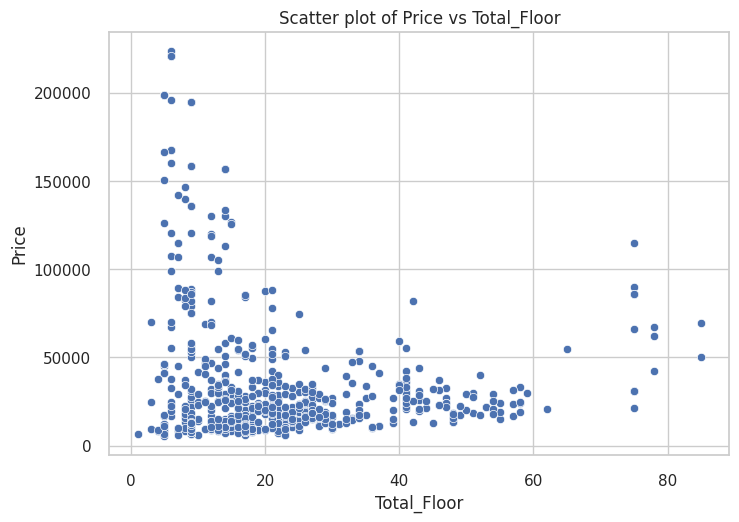

In [23]:
sns.scatterplot(x='Total_Floor', y='Price', data=df)
plt.title('Scatter plot of Price vs Total_Floor')
plt.xlabel('Total_Floor')
plt.ylabel('Price')
plt.show()

In [24]:
correlation = df['Total_Floor'].corr(df['Price'])
print(f"Correlation: {correlation}")

Correlation: -0.5518520449327332


Вывод: значение -0.5518520449327332 указывает на отрицательную корреляцию, существует обратная взаимосвязь между двумя переменными: когда одна переменная увеличивается, другая уменьшается. А также коэффициент указывает на умеренную силу корреляции. То есть мы можем утверждать, что наша гипотеза опровергнута, но в то же время рождается новая зависимость - по нашим данным чем ниже этаж, тем дороже жильё.

##Доработка, основанная на комментариях преподавателя

Мы решили, что для более точного анализа стоит учесть распределение цен по разным диапазонам этажности. И разделили все квартиры на 5 типов, в зависимости от этажности, и построили Ящики с усами по этим данным.

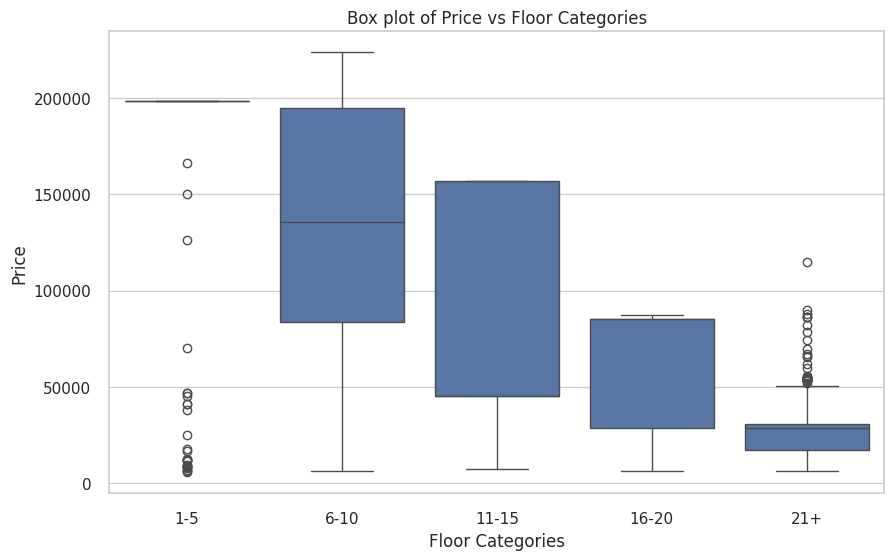

In [45]:
bins = [0, 5, 10, 15, 20, df['Total_Floor'].max()]
labels = ['1-5', '6-10', '11-15', '16-20', '21+']
df['Floor_Category'] = pd.cut(df['Total_Floor'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Floor_Category', y='Price', data=df)
plt.title('Box plot of Price vs Floor Categories')
plt.xlabel('Floor Categories')
plt.ylabel('Price')
plt.show()

**Вывод 2.0**: Квартиры в домах с меньшим количеством этажей (1-5 и 6-10 этажей) имеют более высокие цены и широкий диапазон цен. Особенно интересно рассмотреть данные по 6-10 этажным домам, учитывая исторические особенности постройки жилых помещений в Москве. Многие 5-этажные дома стоят со времён СССР и они уступают по комфортности 6-10 этажным домам, которые как раз таки являются малоэтажным новостроем, поэтому в среднем аренда таких жилых помещений выходит дороже.

С увеличением этажности дома (11-15, 16-20, 21+ этажей) медианная цена на квартиры снижается, и диапазон цен становится более узким, что подтверждает гипотезу о том, что в многоэтажных домах цены на квартиры могут быть ниже из-за большей конкуренции и количества доступных квартир. Но и не стоит забывать, что выборке есть выбросы.

3) Для того, чтобы доказать или опровергнуть первую гипотезу, будем строить диаграмму рассеяния, чтобы выявить взаимосвязи между переменными, а также высчитывать корелляцию между переменными День, когда выложили объявление и Стоимостью аренды.

3.1) Изменение типа данный в таблице Date. Сначала добавим словарь с названиями месяцев и их аналогом в числовом представлении. Далее пропишим функцию, которая будет заменять названия месяцев с одного формата на другой.

In [25]:
months = {
    'янв': '01', 'фев': '02', 'мар': '03', 'апр': '04',
    'май': '05', 'июн': '06', 'июл': '07', 'авг': '08',
    'сен': '09', 'окт': '10', 'ноя': '11', 'дек': '12'
}

In [26]:
def replace_month(date_str):
    for rus, num in months.items():
        date_str = date_str.replace(rus, num)
    return date_str

3.2) Преобразование даты в таблице.

In [27]:
df['Date'] = df['Date'].apply(replace_month)
df['Date'] = pd.to_datetime(df['Date'] + ' 2024', format='%d %m %Y')

3.3) Добавление нового столбца с днём недели.

In [28]:
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Day_of_Week_Num'] = df['Date'].dt.dayofweek

In [29]:
display(df.head())

,ID,Date,Price,Metro,Metro_Time,Rooms,Area,Floor,Total_Floor,Floor_Ratio,Day_of_Week,Day_of_Week_Num
0,1,2024-04-12,198460,Площадь Революции,3,2,88.50,2,5,0.400000,Friday,4
2,3,2024-04-12,30790,Площадь Гагарина,9,2,64.07,21,75,0.280000,Friday,4
3,5,2024-04-12,83800,Китай-город,2,2,82.40,5,8,0.625000,Friday,4
4,6,2024-04-12,85974,Маяковская,1,2,62.30,8,9,0.888889,Friday,4
5,8,2024-04-08,135540,Парк Культуры,10,2,75.30,4,9,0.444444,Monday,0


3.4) Построение диаграммы рассеяния.

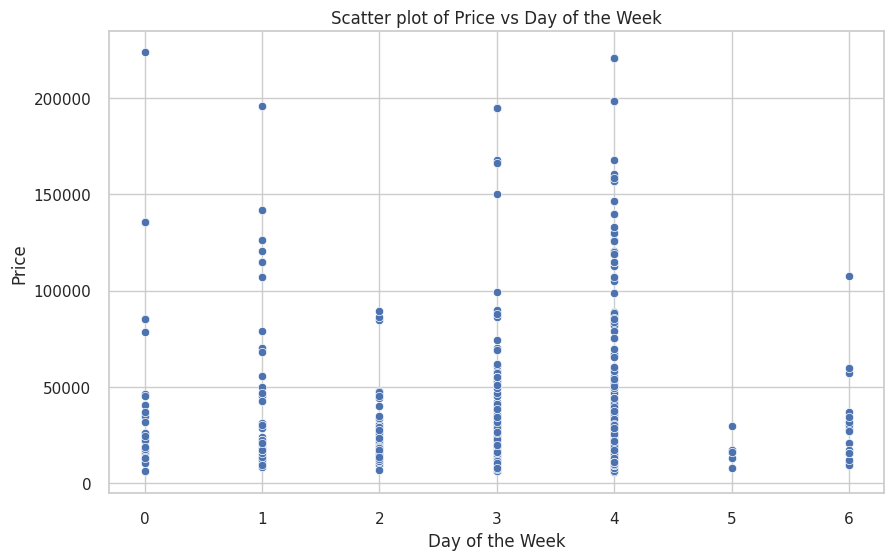

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Day_of_Week_Num', y='Price', data=df)
plt.xlabel('Day of the Week')
plt.ylabel('Price')
plt.title('Scatter plot of Price vs Day of the Week')

plt.show()

3.5) Вычисление корелляции.

In [31]:
correlation = df['Day_of_Week_Num'].corr(df['Price'])
print(f"Correlation: {correlation}")

Correlation: -0.11160744790204541


3.6) Подсчёт количества выложенных объявлений в каждый день недели.

In [32]:
ad_count_by_day = df['Day_of_Week'].value_counts()
print(ad_count_by_day)

Day_of_Week
Friday       3621
Thursday      652
Monday        516
Wednesday     291
Saturday      254
Tuesday        39
Sunday         17
Name: count, dtype: int64


Вывод: корелляция между переменными крайне мала, на диаграмме тоже особой зависимости не выявлено, гипотеза опровергнута однако крайне интересно, что больше половины объявлений было выложено в Пятницу (то есть в 4 день недели).

##Доработка, основанная на комментариях преподавателя

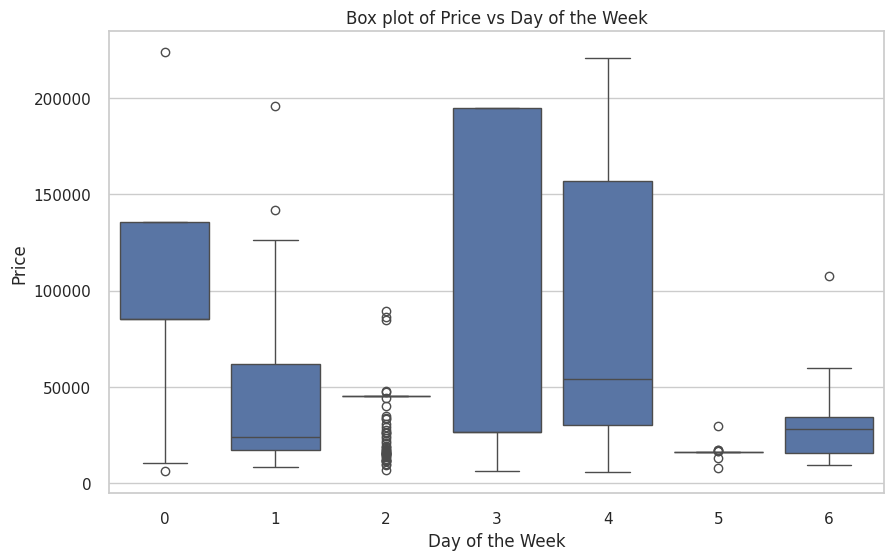

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day_of_Week_Num', y='Price', data=df)
plt.xlabel('Day of the Week')
plt.ylabel('Price')
plt.title('Box plot of Price vs Day of the Week')

plt.show()

**Вывод 2.0**: Наибольшие колебания цен наблюдаются в четверг и пятницу, что может свидетельствовать о более высоком спросе или других рыночных факторах в эти дни. В то же время, среда и суббота показывают более стабильные цены с меньшими разбросами. Это может быть полезной информацией для владельцев недвижимости, которые хотят оптимизировать время публикации объявлений для достижения наилучшей цены аренды.

Гипотеза о том, что день недели влияет на стоимость аренды недвижимости, находит частичное подтверждение.

# Шаг 7. Машинное обучение

Прогнозирование цены недвижимости: задача регрессии, в которой модель обучается на основе характеристик квартиры для предсказания ее цены. И владелец, планирующий выставить своё жильё для аренды сможет определить выгодные условия, сравнив своё жильё с похожими вариантами.




1) Подключение библиотек.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

2) Разделение данных на признаки (X) и целевую переменную (y).

In [34]:
X = df.drop(columns=['Price'])
y = df['Price']

3) Разделение данных на обучающую и тестовую выборки в соотношении 80/20.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4) Удаление не численных столбцов (так как из-за этого возникают ошибки).

In [36]:
X_train = X_train.drop(columns=['Metro', 'Date', 'Day_of_Week'])
X_test = X_test.drop(columns=['Metro', 'Date', 'Day_of_Week'])

5) Обучение модели линейной регрессии

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

6) Предсказания на тестовом наборе данных.

In [38]:
y_pred = model.predict(X_test)

7) Оценка качества модели.

In [39]:
train_predictions = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)
print(f"Средняя квадратичная ошибка на обучающем наборе: {train_mse}")

test_predictions = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
print(f"Средняя квадратичная ошибка на тестовом наборе: {test_mse}")

Средняя квадратичная ошибка на обучающем наборе: 699546674.2494037
Средняя квадратичная ошибка на тестовом наборе: 647819395.8916131


8) Построение графика фактических и предсказанных значений.

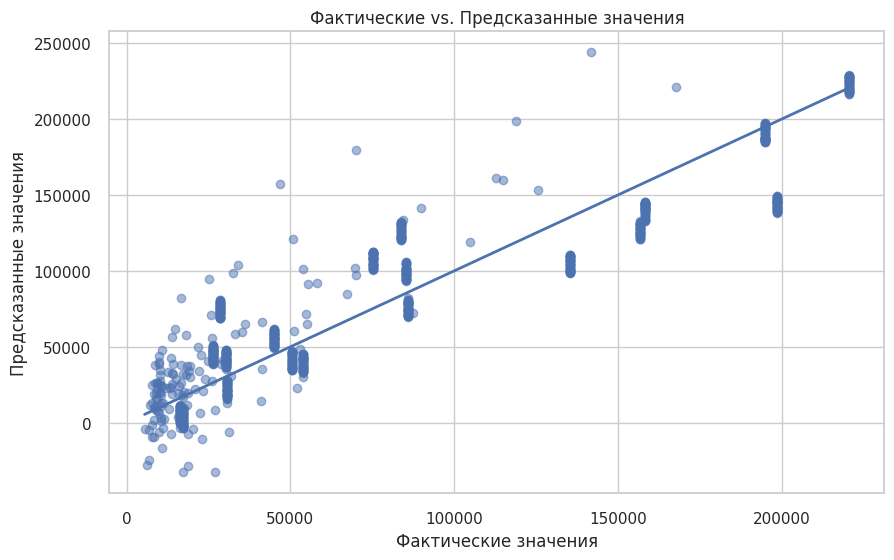

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические vs. Предсказанные значения')
plt.show()

Вывод: значения средняя квадратичной ошибки на обоих наборах данных получились крайне высокими, что может указывать на то, что модель не очень хорошо обобщает данные и склонна к переобучению или недообучению. Однако, в графическом представлении модель показала себя достойно, явно видна тенденция стремления к диагональной линии от минимального до максимального значения фактических цен на недвижимость.



9) Пример расчёта стоимости.

In [41]:
# ID, Metro_Time, Rooms, Area, Floor, Total_Floor, Floor_Ratio, Day_of_Week_Num
new_data_1 = [[6000, 2, 2, 66, 18, 18, 1, 4]]

predicted_price = model.predict(new_data_1)

print(f"Предсказанная стоимость аренды: {round(predicted_price[0])} рублей в месяц")

Предсказанная стоимость аренды: 86176 рублей в месяц


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


10) Пример расчёта стоимости с рандомными данными.

In [42]:
import random

new_id = random.randint(6000, 9999)
new_metro_time = random.randint(1, 30)
new_rooms = random.randint(1, 4)
new_area = random.randint(30, 200)
new_floor = random.randint(1, 5)
new_total_floor = random.randint(5, 25)
new_floor_ratio = new_floor/new_total_floor
new_day_of_week_num = random.randint(0, 6)

new_data = [[new_id, new_metro_time, new_rooms, new_area, new_floor, new_total_floor, new_floor_ratio, new_day_of_week_num]]
predicted_price = model.predict(new_data)
print(f"Предсказанная стоимость аренды: {round(predicted_price[0])} рублей в месяц")
print(new_data)

Предсказанная стоимость аренды: 208732 рублей в месяц
[[8765, 17, 3, 136, 1, 21, 0.047619047619047616, 4]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##Планы по развитию проекта

Наша модель не точна, так как отсутствует крайне важный фактор - станция метро, а в Москве это один из главных ценообразующих факторов, который мы планируем включить в нашу модель в будущем. На данный момент это оказалось трудно реализовать из-за отсутствия структурированных данных в сети Интернет и большого количества станций Московского метрополитена (более 260). Однако у нас уже есть идея как мы будем оценивать станцию метро: мы разделим все станции на 4 класса, соответственно, чем выше класс, тем "центральнее" расположение, тем дороже стоимость аренды.

*    1 класс - станции внутри Кольцевой линии (линия 5)

*    2 класс - станции внутри Большой кольцевой линии (БКЛ, линия 11)

*    3 класс - станции внутри Московского центрального кольца (МЦК, линия 14)

*    4 класс - все остальные "заМЦКадыши" метрополитена